## Part 1. Investigate  the  correlation between  margarine  consumption  and  divorce  rates  in  Maine.  Would  an  increase  in  the preference for margarine lead to skyrocketing divorce rates

In [1]:
install.packages('dslabs')
install.packages('dplyr')
install.packages('ggplot2')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
library(dslabs)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
data('divorce_margarine')

In [4]:
str(divorce_margarine)

'data.frame':	10 obs. of  3 variables:
 $ divorce_rate_maine              : num  5 4.7 4.6 4.4 4.3 4.1 4.2 4.2 4.2 4.1
 $ margarine_consumption_per_capita: num  8.2 7 6.5 5.3 5.2 4 4.6 4.5 4.2 3.7
 $ year                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009


In [5]:
divorce_margarine

divorce_rate_maine,margarine_consumption_per_capita,year
<dbl>,<dbl>,<int>
5.0,8.2,2000
4.7,7.0,2001
4.6,6.5,2002
4.4,5.3,2003
4.3,5.2,2004
4.1,4.0,2005
4.2,4.6,2006
4.2,4.5,2007
4.2,4.2,2008


In [ ]:
#Visualizing the relationship between margarine consumption and divorce rates

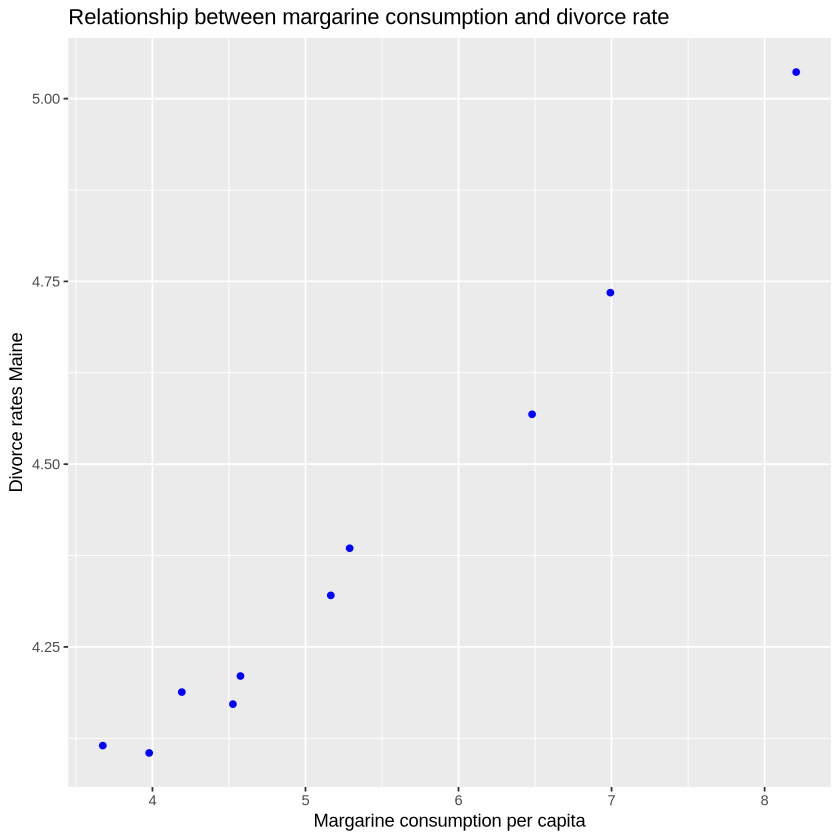

In [8]:
ggplot(divorce_margarine,
       aes(x = margarine_consumption_per_capita,
           y = divorce_rate_maine)) + 
    geom_point(position = 'jitter', color = "blue") +
    labs(
        x = "Margarine consumption per capita",  # X-axis title
        y = "Divorce rates Maine",  # Y-axis title
        title = "Relationship between margarine consumption and divorce rate" # Optional: main plot title
      )

In [9]:
#Testing the correlation
cor.test(divorce_margarine$margarine_consumption_per_capita, divorce_margarine$divorce_rate_maine)


	Pearson's product-moment correlation

data:  divorce_margarine$margarine_consumption_per_capita and divorce_margarine$divorce_rate_maine
t = 23.055, df = 8, p-value = 1.33e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9676666 0.9983038
sample estimates:
      cor 
0.9925585 


In [ ]:
#There is a strong positive correlation between the preference for margarine and divorce rates.
#However, correlation does not imply causation, and we cannot claim that an increasing preference
#for margarine would lead to higher divorce-rates. 

## Part 2 Load the ‘GSSvocab’dataset from the ‘car’package. This dataset contains people’s scores on an Englishvocabulary test and includes demographic information.

In [10]:
load('GSSvocab.RData')
str(GSSvocab)

'data.frame':	28867 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


In [11]:
head(GSSvocab)

,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1978.1,1978,female,yes,50-59,12 yrs,10,52,12
1978.2,1978,female,yes,60+,<12 yrs,6,74,9
1978.3,1978,male,yes,30-39,<12 yrs,4,35,10
1978.4,1978,female,yes,50-59,12 yrs,9,50,12
1978.5,1978,female,yes,40-49,12 yrs,6,41,12
1978.6,1978,male,yes,18-29,12 yrs,6,19,12


### Filter for the year 1978 and remove rows with missing values (the function na.exclude()is one way to do this – check out the documentation!)

In [12]:
data1978 <- GSSvocab %>%
    filter(year==1978)
str(data1978)

'data.frame':	1532 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


In [13]:
#Removing missing values

data1978 <- na.exclude(data1978)
str(data1978)

'data.frame':	1477 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "na.action")= 'exclude' Named int [1:55] 179 193 258 329 346 389 390 408 429 451 ...
  ..- attr(*, "names")= chr [1:55] "1978.179" "1978.193" "1978.258" "1978.329" ...


### Is a person’s  score on the vocabulary test  (‘vocab’) significantly impacted by their level  of education (‘educ’)? Visualize the relationship in a plot and build a model. Briefly explain the results.

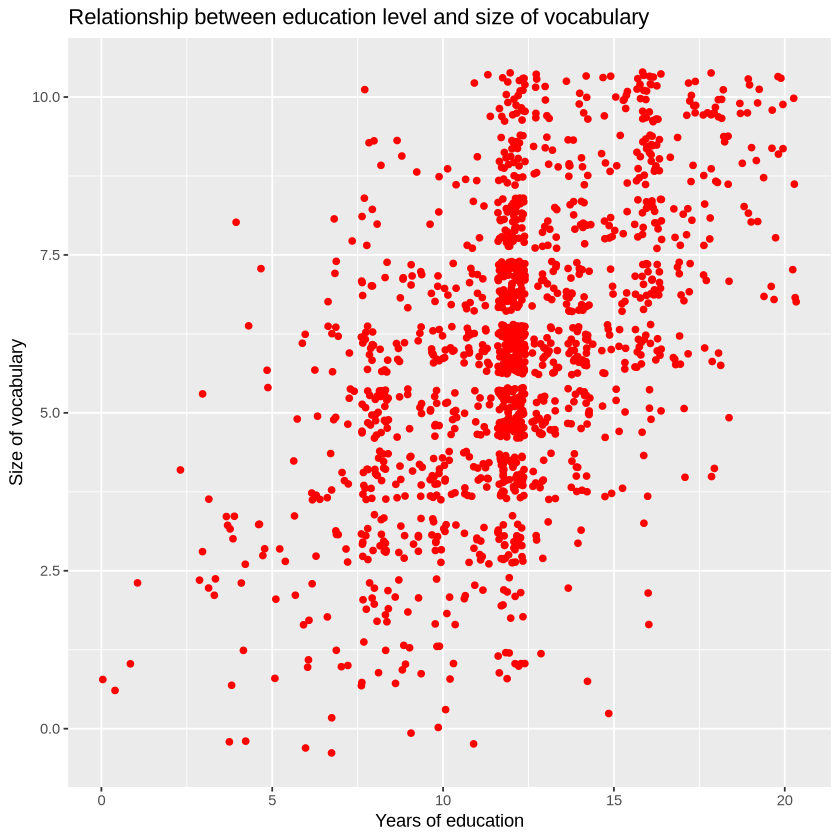

In [15]:
#Visualization of the relationship

ggplot(data1978,
       aes(x = educ,
           y = vocab)) +
    geom_point(position = 'jitter', color = "red") +
    labs(
        x = "Years of education",  
        y = "Size of vocabulary",  
        title = "Relationship between education level and size of vocabulary" 
      )

In [16]:
vocab_educ_model <- lm(vocab ~ educ, data1978)
summary(vocab_educ_model)


Call:
lm(formula = vocab ~ educ, data = data1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


In [ ]:
#Explanation 

#For each year of education, a speaker's vocabulary score increases by 0.39 points
#Education can account for 28,8% of the variation in the dependent variable
#The p-value is below 0.05, which means that the impact of education on a person's score on a vocabulary test
#is stastistically significant

### Whether a person is the native of an English-speaking country(‘nativeBorn’) could potentially have an impact on the size of their vocabulary. Visualize the relationship and add the predictor to the model. Briefly explain the results

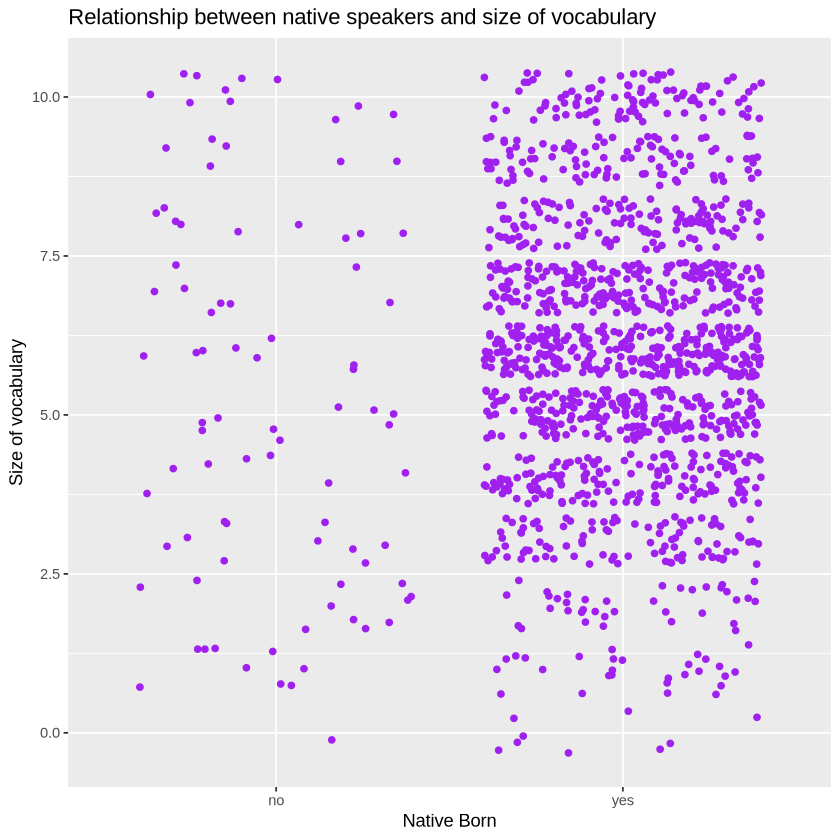

In [17]:
#Visualization of relationship

ggplot(data1978,
       aes(x = nativeBorn,
           y = vocab)) +
    geom_point(position = 'jitter', color = "purple") +
    labs(
        x = "Native Born", 
        y = "Size of vocabulary",  
        title = "Relationship between native speakers and size of vocabulary" 
      )

In [18]:
#Adding the predictor to the model

vocab_native_model <- lm(vocab ~ educ + nativeBorn, data1978)
summary(vocab_native_model)


Call:
lm(formula = vocab ~ educ + nativeBorn, data = data1978)

Residuals:
   Min     1Q Median     3Q    Max 
-7.162 -1.200  0.015  1.231  5.803 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.62803    0.27651   2.271  0.02327 *  
educ           0.39222    0.01601  24.499  < 2e-16 ***
nativeBornyes  0.65032    0.20551   3.164  0.00159 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.879 on 1474 degrees of freedom
Multiple R-squared:  0.2931,	Adjusted R-squared:  0.2921 
F-statistic: 305.6 on 2 and 1474 DF,  p-value: < 2.2e-16


In [ ]:
#Explanation

#Being a native born increases the vocabulary score by 0.65 points 
#Each year of education increases the vocabulary score by 0.39 points.
#The p-value for both predictors are below 0.05, which means that both impacts are stastistically significant
#The predictors education and native born can account for 29,3% of the variation in the outcome


### Does  a  person’s  level  of  education  depend  on  whether they  are  a  native  of  the  country? Visualize the relationship. Do you think it makes sense to add the relationship as an interaction term? Try creating the model and briefly explain the results

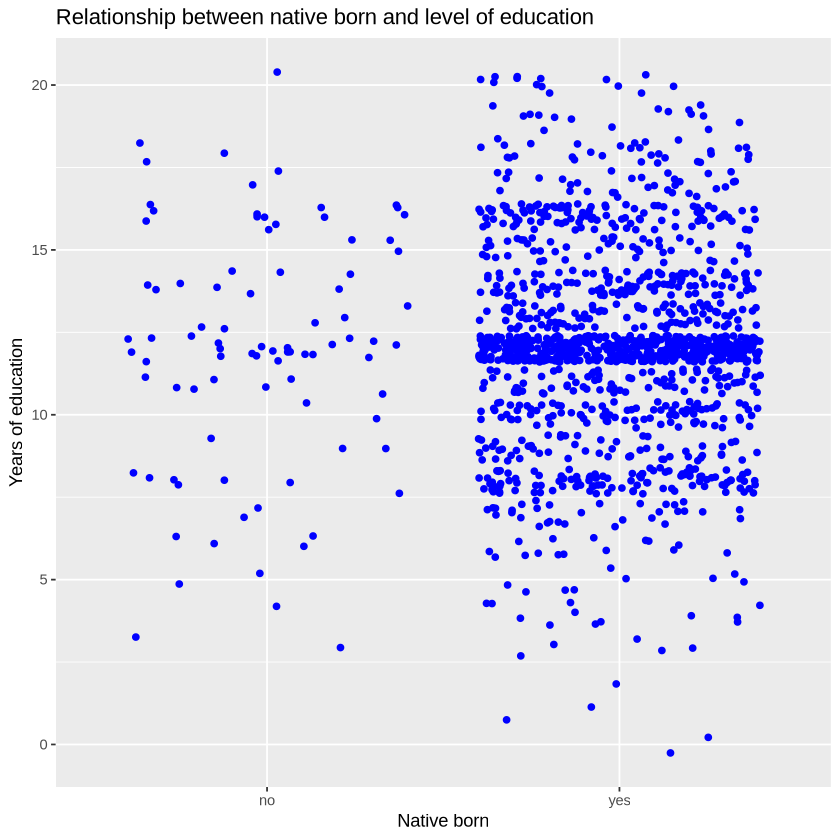

In [19]:
ggplot(data1978,
       aes( x = nativeBorn,
            y = educ)) +
    geom_point(position = 'jitter', color = "blue") +
    labs(
        x = "Native born",
        y = "Years of education",
        title = "Relationship between native born and level of education"
        )
        

In [21]:
#The visualization shows that the distribution for native born and non-native born is broadly the same,
#which suggests that it does not make sense to add this predictor to the model


#Interaction term
vocab_educ_native_model <- lm(vocab ~ educ * nativeBorn, data1978)
summary(vocab_educ_native_model)


Call:
lm(formula = vocab ~ educ * nativeBorn, data = data1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1554 -1.2049  0.0149  1.2347  5.9857 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.35394    0.68780   0.515    0.607    
educ                0.41510    0.05496   7.553 7.45e-14 ***
nativeBornyes       0.95000    0.71855   1.322    0.186    
educ:nativeBornyes -0.02501    0.05745  -0.435    0.663    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.88 on 1473 degrees of freedom
Multiple R-squared:  0.2932,	Adjusted R-squared:  0.2917 
F-statistic: 203.7 on 3 and 1473 DF,  p-value: < 2.2e-16


In [ ]:
#The p-values for native born and educ:nativeBorn are both above 0.05, which means that the effects given
#by this model are not stastically significant. 
#The estimate coefficient for educ:nativeBorn is only -0.025, meaning that this factor makes close to no difference on a 
#person's vocabulary score. It does not make sense to include the relationship as an interaction term.


### Which model performs best?

In [22]:
anova(vocab_educ_model, vocab_native_model, vocab_educ_native_model)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1475,5241.828,NA,NA,NA,NA
2,1474,5206.458,1,35.3707012,10.0082911,0.001590199
3,1473,5205.788,1,0.6695224,0.1894442,0.663443355


In [ ]:
#The second model performs best, as it is statistically significant with a p-value below 0.05. 